# Mathematical Underpinnings - Lab 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = (a-1)^2 + \sigma^2$,

So the minimizer is a=1. The bigger the value of $sigma$ the bigger value of the population risk. This makes sense, if there's more variability in $\varepsilon$ the risk should be bigger. 

In our task we know $a^* = 1$.

In [2]:
def population_risk(a, sigma_eps):
    return np.power(sigma_eps,2) + np.power(1-a,2)

### b)

In [3]:
def empirical_risk(a,x,y):
    return np.mean(np.power(a*x-y,2))

In [4]:
n = 50
sigma_eps = 1
X = np.random.normal(0,1,n)
eps = np.random.normal(0,sigma_eps**2, n)
y = X + eps

In [5]:
print(f'{population_risk(1,sigma_eps)=}')
print(f'{empirical_risk(1,X,y)=}')

population_risk(1,sigma_eps)=1
empirical_risk(1,X,y)=1.0158923559484396


### c)

In [6]:
a_ = np.linspace(-0.5,3,1000)
pop = population_risk(a_,1)
emp = np.array([empirical_risk(a,X,y) for a in a_])

result_emp_min = minimize(empirical_risk,-1,args=(X,y))
print(result_emp_min)
empirical_minimum = result_emp_min.fun
empirical_argmin = result_emp_min.x

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.9600302130459609
        x: [ 1.287e+00]
      nit: 2
      jac: [-1.267e-07]
 hess_inv: [[ 7.395e-01]]
     nfev: 6
     njev: 3


In [7]:
population_risk(1,sigma_eps)

1

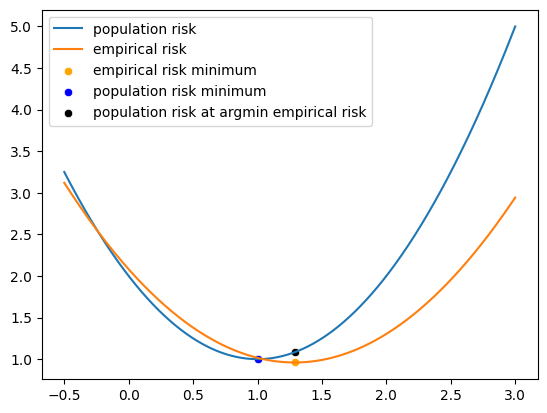

In [8]:
sns.lineplot(x = a_, y = pop, label='population risk')
sns.lineplot(x = a_, y = emp, label='empirical risk')
sns.scatterplot(x=empirical_argmin, y=empirical_minimum, label='empirical risk minimum', color='orange')
sns.scatterplot(x=[1], y=[population_risk(1,1)], label='population risk minimum', color='blue')
sns.scatterplot(x=empirical_argmin, y=population_risk(empirical_argmin,sigma_eps), label='population risk at argmin empirical risk', color='black')
plt.show()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [9]:
population_risk(empirical_argmin,1) - population_risk(1,1)

array([0.08261633])

In [10]:
# excess risk
def excess_risk(X,y):
    result_emp_min = minimize(empirical_risk,-1,args=(X,y))
    empirical_argmin = result_emp_min.x
    return population_risk(empirical_argmin,1) - population_risk(1,1)


In [11]:
X = np.random.normal(0, 1, size=n)
eps = np.random.normal(0, 1, size=n)
y = X + eps
excess_risk(X,y)

array([0.01656197])

In [12]:
# simulatioens with fixed sample size
risks = []

L = 200
n = 50
for _ in range(L):
    X = np.random.normal(0, 1, size=n)
    eps = np.random.normal(0, 1, size=n)
    y = X + eps
    risks.append(excess_risk(X,y))
    
np.array(risks).mean()


0.02196406715456254

In [13]:
# simulations for various sample sizes
results = []
for sample_size in np.arange(50,1000,50):
    for _ in range(L):
        X = np.random.normal(0, 1, size=sample_size)
        eps = np.random.normal(0, 1, size=sample_size)
        y = X + eps
        results.append({
            'sample_size' : sample_size, 'excess_risk' : excess_risk(X,y)[0]
        })

In [14]:
import pandas as pd

<Axes: xlabel='sample_size', ylabel='excess_risk'>

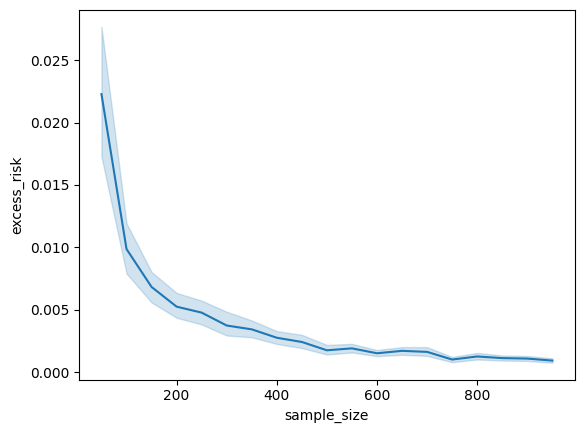

In [15]:
df = pd.DataFrame(results)
sns.lineplot(x='sample_size',y='excess_risk', data=df)